# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


You will require the following libraries:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

# Module 1: Importing Data Sets


* Load the csv:


In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

* We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* We use the method <code>shape</code> to check the shape of dataframe

In [4]:
df.shape

(21613, 22)

 We can know the dataframe has 21613 rows and 22 columns

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


# Module 2: Data Wrangling


### Question 1
* Display the data types of each column using the function dtypes

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<h4> Evaluate </h4>

Data has float, integer, and object type values.
Data type of timeStamp is object that need to conver to datetime.

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

* Checking the data has null and counting them

In [8]:
df.isnull().sum().to_frame()

,0
Unnamed: 0,0
id,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0


We can see we have missing values for the columns <code> bedrooms</code> : 13  and <code> bathrooms </code> : 10

* We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code> parameter to <code>True</code>

In [9]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

* We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>

In [10]:
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Check data again

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Question 2

* Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>


In [12]:
df.drop(["id", "Unnamed: 0"],axis = 1, inplace =True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


* drop the column "date" from axis 1 using method <code> drop()</code>

In [13]:
df.drop('date', axis = 1, inplace = True)

* Remove Duplicate rows

In [14]:
df.shape

(21613, 22)

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(21613, 22)

<h4>Conclusion:</h4>
<p> There was no duplicate data in this dataset.<p/>

# Module 3: Exploratory Data Analysis


### Question 3

* Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [17]:
count_floors = df['floors'].value_counts().to_frame()
count_floors.rename(columns={'floors': 'Counted'}, inplace = True)
count_floors.index.name = 'Floors'
count_floors

,Counted
Floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

* Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


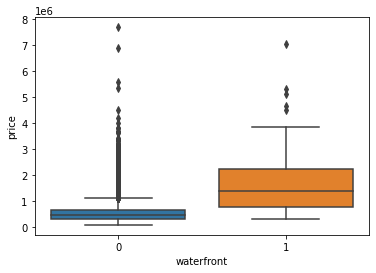

In [18]:
sns.boxplot(x = "waterfront", y = "price", data = df);

<h4> Evaluate </h4>
Waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.

It is quite obvious that properties facing water bodies are always quite expensive, however, they are only a few in number.

### Question 5

* Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


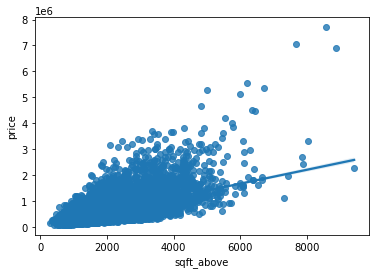

In [19]:
sns.regplot(x = "sqft_above", y = "price", data = df);

<h4> Observe the distribution of target variable - Price</h4>
    
<p> If target variable's distribution is too skewed then the predictive modeling will not be possible <p/>

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


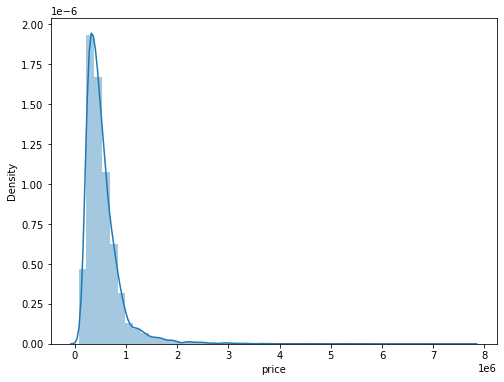

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'])
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


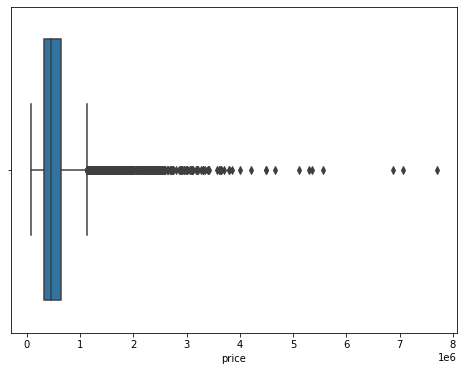

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(df['price'])
plt.show()

<p> Most the property prices falls between 0 and around $ 1.5 million and we have some outliers for really expensive houses and it may actually make sense to drop those outliers in our analysis. So we can essentially build a model that realistically predicts the price of a house if its intended value is somewhere between let's say 0 and 2 million dollars.</p>

In [22]:
def detect_outliers(x, c = 1.5):
    Q1, Q3 = np.percentile(x, [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (IQR * c)
    upper = Q3 + (IQR * c)
    # Generate outliers
    indicies = np.where((x > upper) | (x < lower))

    return indicies

In [23]:
# Detect all Outliers 
priceOutliers = detect_outliers(df['price'])
print("Total Outliers count : ",len(priceOutliers[0]))

Total Outliers count :  1146


In [24]:
df.shape

(21613, 22)

In [25]:
# Remove outliers
df = df.drop(priceOutliers[0])

In [26]:
df.shape

(20467, 22)

### Correlation Among Explanatory Variables

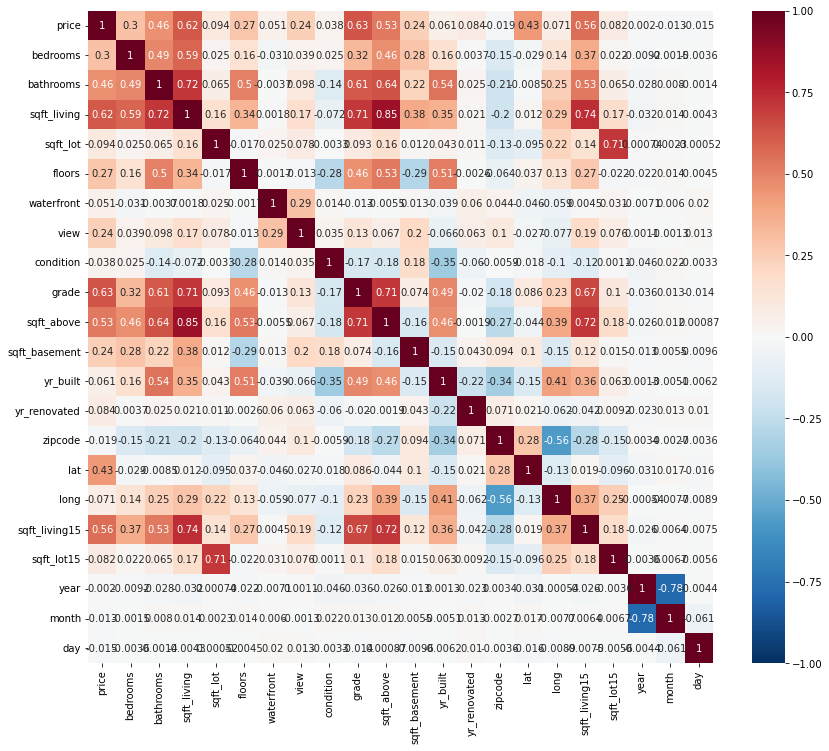

In [27]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [28]:
price_corr_others = df.corr()['price'].sort_values(ascending = False).to_frame()
price_corr_others

,price
price,1.000000
grade,0.631182
sqft_living,0.622333
sqft_living15,0.562090
sqft_above,0.530451
bathrooms,0.455989
lat,0.430762
bedrooms,0.296647
floors,0.273987
view,0.238268


### Visualize the correlation between price vs others features

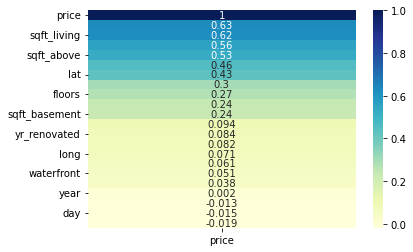

In [29]:
# plotting correlation heatmap
sns.heatmap(price_corr_others, cmap="YlGnBu", annot=True);

<h4> Conclusion </h4>
The feature like sqft_living, grade, sqft_above, sqft_living15 , bathrooms, view , sqft_basement, bedrooms, lat, floors are hightly correlated with lable price. Therefore, we find the highly correlated features with label Price

* drop the column 'zipcode' because it's not correlation price

In [30]:
df.drop('zipcode', axis = 1, inplace = True )

<h4> 1. View vs Price </h4>

[]

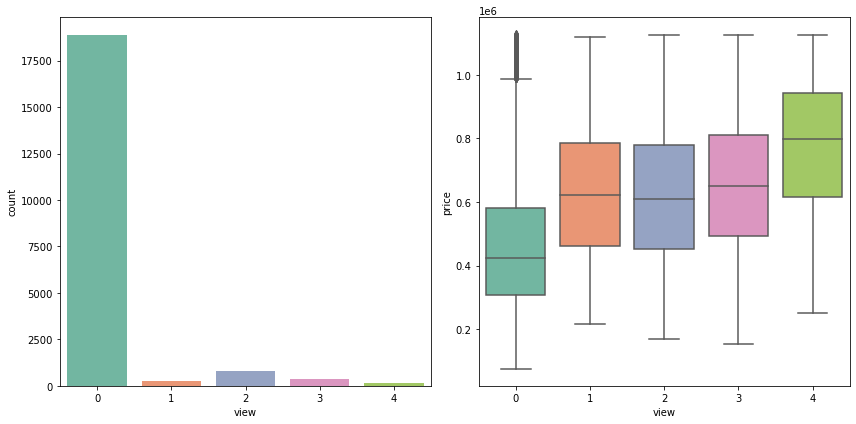

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='view',data=df, palette='Set2', ax=axs[0]);
sns.boxplot(y='price',x='view',data=df, palette='Set2', ax=axs[1]);

plt.tight_layout()
plt.plot()

<h4> Evaluate </h4>
View ranges from 0 to 4 and it shows how good the view of the property was. Above plots graph shows that majority of houses do have good view and that's why their price range is also very less

<h4> 2. Grade vs Price </h4>

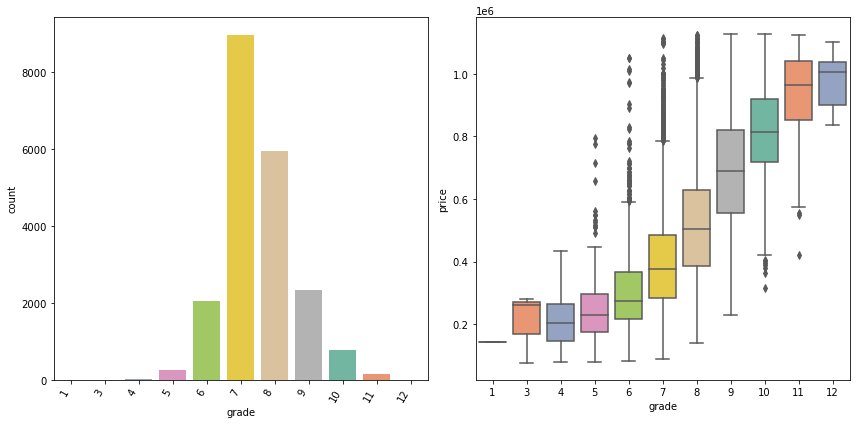

In [32]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

ax = sns.countplot(x='grade',data=df, palette='Set2', ax=axs[0]);
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right");
sns.boxplot(y='price',x='grade',data=df, palette='Set2', ax=axs[1]);

plt.tight_layout()
plt.show()

<h4> Evaluate </h4>

Grade - An index from 1 to 13
+ 1-3 falls short of building construction and design
+ 7 has an average level of construction and design
+ 11-13 has a high-quality level of construction and design.

Most of the houses have an average level of construction and design. And as the construction and design quality increases, their prices. It actually makes sense that good quality construction and design have higher prices.

<h4> 3. Bedroom vs price </h4>

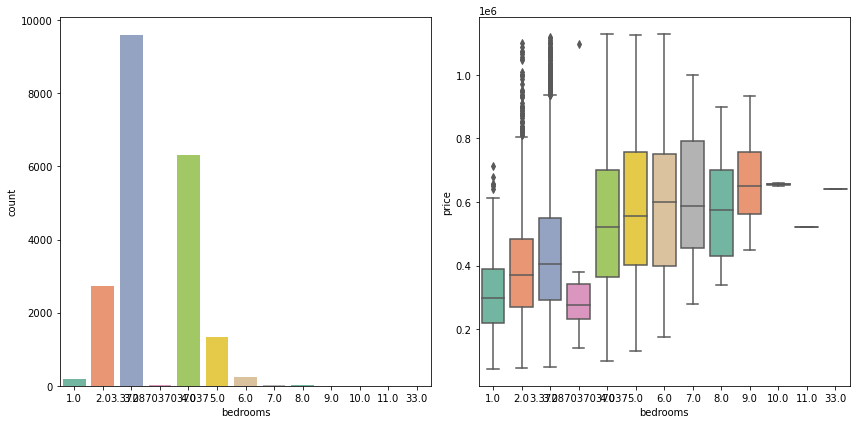

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='bedrooms',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='bedrooms',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

<h4> Evaluate </h4>
Graph is showing the distribution of prices per bedroom. There's quite a bit of variation in bedrooms ranging between 3 and 7. And that also makes sense because if we took a look at our count plot it looks like the majority of the houses have bedrooms between maybe 3 and 7. So it also makes sense that there's quite a large variety of prices there.

<h4> 4. Bathroom vs price </h4>

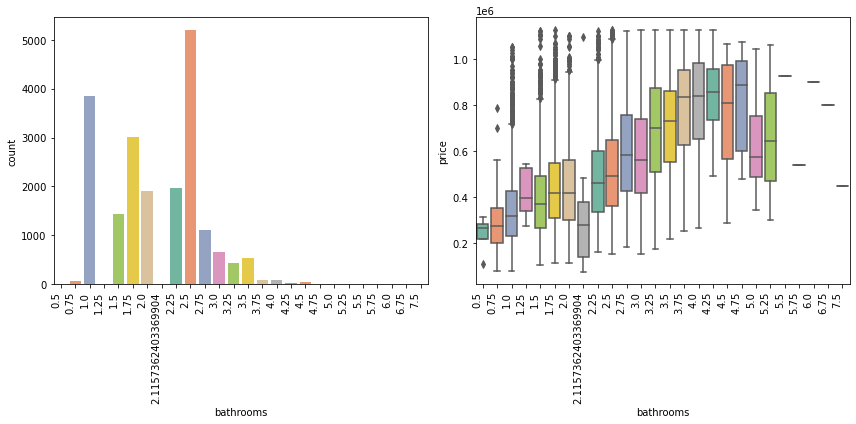

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

chart1 = sns.countplot(x='bathrooms',data=df, palette='Set2',ax=axs[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90, horizontalalignment='right')

chart2 = sns.boxplot(y='price',x='bathrooms',data=df, palette='Set2', ax=axs[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

<h4> Evaluate </h4>
Most of the houses have 1 to 4 bathrooms and their prices is also less compared to houess have more than 4 bathrooms. 

<h4> 5. Floors vs price </h4>

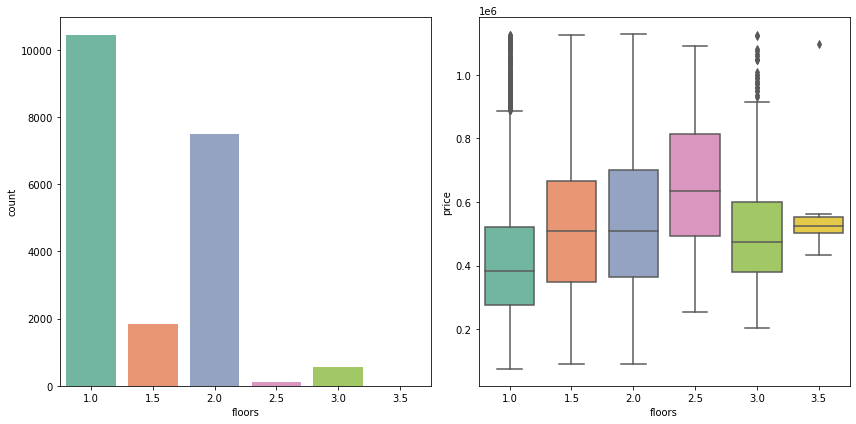

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='floors',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='floors',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

<h4> Evaluate </h4>
A large number of properties have only the ground floor and few properties have penthouses also. However it does not show that high-story buildings are more expensive, maybe other factors like the total size of the property or location are also playing a major role in deciding the price of the property.

### Working with Feature Data

#### feature time(year, month)

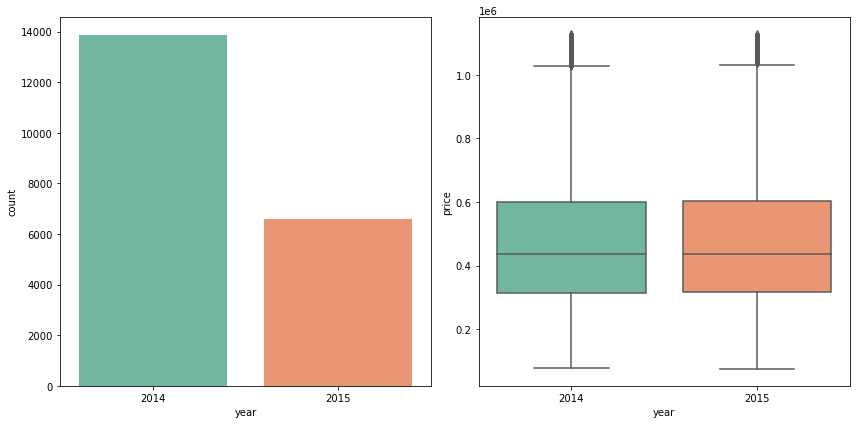

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='year',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='year',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

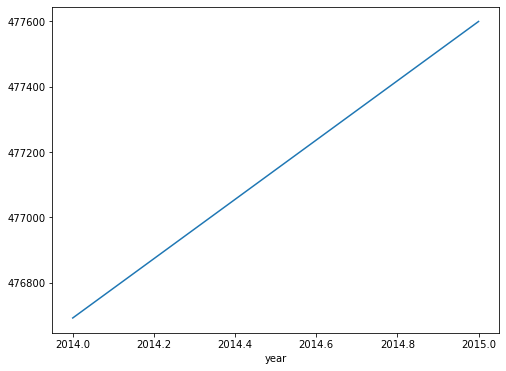

In [37]:
plt.figure(figsize=(8,6))
df.groupby('year').mean()['price'].plot();

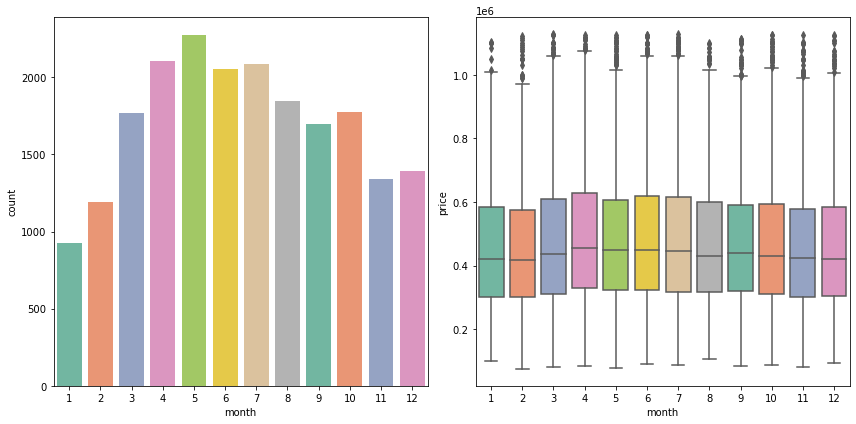

In [38]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='month',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='month',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

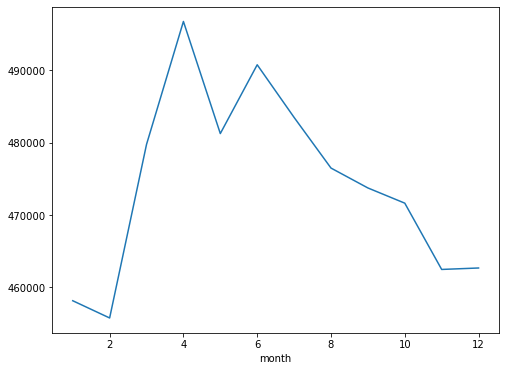

In [39]:
plt.figure(figsize=(8,6))
df.groupby('month').mean()['price'].plot();

#### Feature Year of renovation

In [40]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda yr : 0 if yr==0 else 1)
df['yr_renovated'].value_counts().to_frame()

,yr_renovated
0,19701
1,766


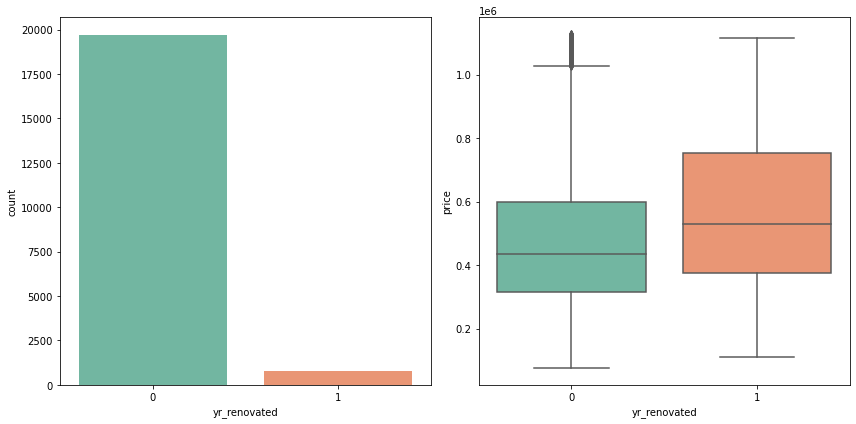

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='yr_renovated',data=df, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='yr_renovated',data=df, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

- feature 'yr_renovated' is 0, which implies that they are not renovated at all
- feature 'yr_renovated' is 1, which implies that they are renovated at all

**Evaluating**

# Module 4: Model Development


### Question 6
Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
X = df[['sqft_living']]
Y = df['price']
lr = LinearRegression()
lr.fit(X,Y)
lr.score(X, Y)

0.3872982757987036

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [44]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Then calculate the R^2. Take a screenshot of your code.

In [45]:
X = df[features]
Y = df['price']
lr = LinearRegression()
lr.fit(X, Y)
lr.score(X, Y)

0.6442217967957355

### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [46]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [47]:
pipe = Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

0.6904896030830756

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3071
number of training samples: 17396


### Question 9
Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data.

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridgeReg = Ridge(alpha=0.1)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)
ridgeReg.score(x_test, y_test)

0.6517355749370279

### Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2

In [52]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
x_test_trans = pr.fit_transform(x_test)
x_train_trans = pr.fit_transform(x_train)
ridgeReg = Ridge(alpha = 0.1)
ridgeReg.fit(x_train_trans,y_train)
ridgeReg.score(x_test_trans,y_test)

0.6695293392785255

## 4.1 Separate Target Variable and Predictor Variables

In [53]:
X = df.drop('price',axis=1).values
Y = df['price'].values

## 4.2 Splitting data into Training and Testing samples

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("Y_train - ",Y_train.shape)
print("X_test - ",X_test.shape)
print("Y_test - ",Y_test.shape)

X_train -  (14326, 20)
Y_train -  (14326,)
X_test -  (6141, 20)
Y_test -  (6141,)


## 4.3 Standard Scaler

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4.4 Create function to evaluate

In [57]:
from sklearn import metrics

def measure_accuracy(original, predicted, train=True):  
    mae = metrics.mean_absolute_error(original, predicted)
    mse = metrics.mean_squared_error(original, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(original, predicted))
    #rmsle = np.sqrt(metrics.mean_squared_log_error(original, predicted))
    r2_square = metrics.r2_score(original, predicted)
    evs = metrics.explained_variance_score(original,predicted)
    
    if train:
        print("Training Result : ")
        print('------------------')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        #print('RMSLE: {0:0.3f}'.format(rmsle))
        print('Explained Variance Score: {0:0.3f}'.format(evs))
        print('R2 Square: {0:0.3f}'.format(r2_square))
        print('\n')
    elif not train:
        print("Testing Result : ")
        print('------------------')
        print('MAE: {0:0.3f}'.format(mae))
        print('MSE: {0:0.3f}'.format(mse))
        print('RMSE: {0:0.3f}'.format(rmse))
        #print('RMSLE: {0:0.3f}'.format(rmsle))
        print('Explained Variance Score: {0:0.3f}'.format(evs))
        print('R2 Square: {0:0.3f}'.format(r2_square))

## 4.3 Modeling

*** Linear Regression***

In [58]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_test_poly = pr.fit_transform(X_test)
X_train_poly = pr.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train_poly, Y_train)

LinearRegression()

In [152]:
Y_train_pred_LR = model_LR.predict(X_train_poly)
Y_test_pred_LR = model_LR.predict(X_test_poly)


In [153]:
import seaborn as sns

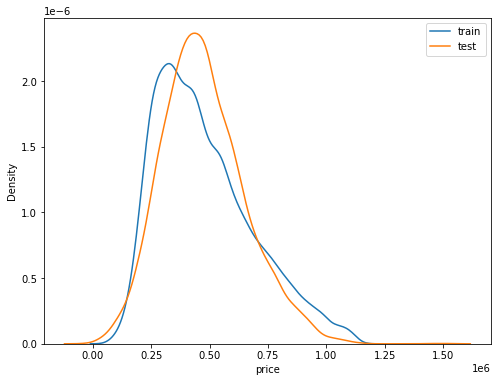

In [154]:
plt.figure(figsize = (8,6))
sns.kdeplot(data = df, x = 'price', label ='train')
sns.kdeplot(x= Y_test_pred_LR, label ='test')
plt.legend()
plt.show()

In [155]:
print("*** Evaluating Linear Regression: ***", "\n")
measure_accuracy(Y_train, Y_train_pred_LR, train = True)
measure_accuracy(Y_test, Y_test_pred_LR, train = False)

*** Evaluating Linear Regression: *** 

Training Result : 
------------------
MAE: 77188.651
MSE: 10443333838.698
RMSE: 102192.631
Explained Variance Score: 0.762
R2 Square: 0.762


Testing Result : 
------------------
MAE: 78077.822
MSE: 11055431631.081
RMSE: 105144.813
Explained Variance Score: 0.738
R2 Square: 0.738


*** RandomForestRegressor ***

In [162]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
model_RF.fit(X_train, Y_train)

RandomForestRegressor()

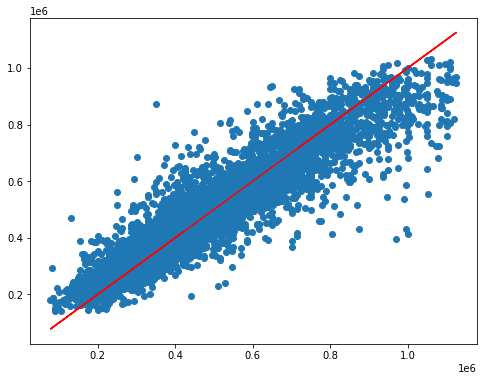

In [163]:
Y_train_pred_RF = model_RF.predict(X_train)
Y_test_pred_RF = model_RF.predict(X_test)
plt.figure(figsize = (8,6))
plt.scatter(Y_test, Y_test_pred_RF,)
plt.plot(Y_test, Y_test, 'r')

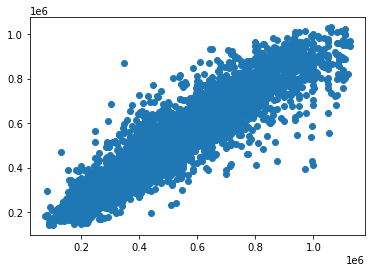

In [172]:
plt.scatter(Y_test,Y_test_pred_RF)

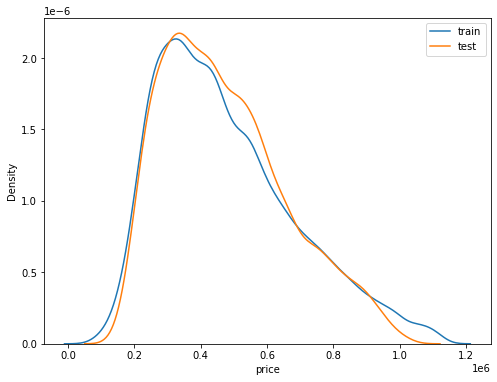

In [122]:
plt.figure(figsize = (8,6))
sns.kdeplot(data = df, x = 'price', label ='train')
sns.kdeplot(x= Y_test_pred_RF, label ='test')
plt.legend()
plt.show()

In [63]:
print("*** Evaluating RandomForest Regressor: ***", "\n")
measure_accuracy(Y_train, Y_train_pred_RF, train = True)
measure_accuracy(Y_test, Y_test_pred_RF, train = False)

*** Evaluating RandomForest Regressor: *** 

Training Result : 
------------------
MAE: 20178.339
MSE: 862000599.713
RMSE: 29359.847
Explained Variance Score: 0.980
R2 Square: 0.980


Testing Result : 
------------------
MAE: 53563.029
MSE: 5976413587.553
RMSE: 77307.267
Explained Variance Score: 0.858
R2 Square: 0.858


*** XGBOOST ***

In [64]:
import xgboost as xg
model_XGB = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
# Fitting the model
model_XGB.fit(X_train, Y_train)

[12:44:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

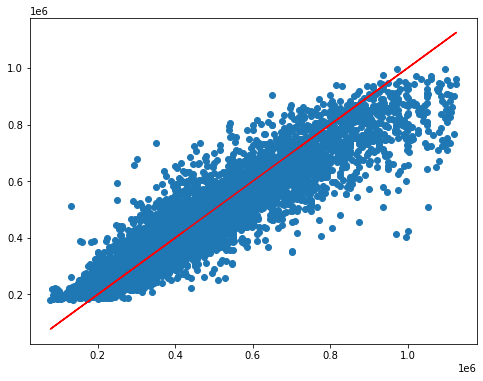

In [65]:
Y_train_pred_XGB = model_XGB.predict(X_train)
Y_test_pred_XGB = model_XGB.predict(X_test)
plt.figure(figsize = (8,6))
plt.scatter(Y_test, Y_test_pred_XGB)
plt.plot(Y_test, Y_test, 'r');

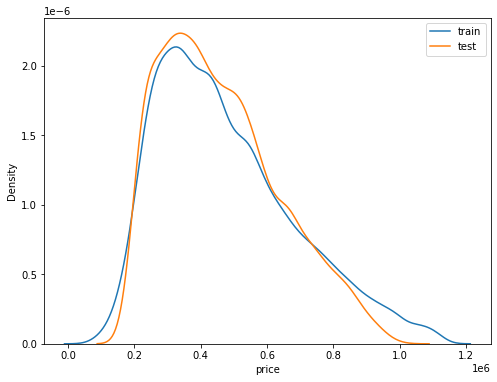

In [143]:
plt.figure(figsize = (8,6))
sns.kdeplot(data = df, x = 'price', label ='train')
sns.kdeplot(x= Y_test_pred_XGB, label ='test')
plt.legend()
plt.show()

In [66]:
print("*** Evaluating XgBoost: ***", "\n")
measure_accuracy(Y_train, Y_train_pred_XGB, train = True)
measure_accuracy(Y_test, Y_test_pred_XGB, train = False)

*** Evaluating XgBoost: *** 

Training Result : 
------------------
MAE: 53300.885
MSE: 5599690571.642
RMSE: 74831.080
Explained Variance Score: 0.877
R2 Square: 0.873


Testing Result : 
------------------
MAE: 59062.178
MSE: 7044829179.416
RMSE: 83933.481
Explained Variance Score: 0.838
R2 Square: 0.833


*** Ridgement Regression ***

In [67]:
pr = PolynomialFeatures(degree = 2)
X_test_poly = pr.fit_transform(X_test)
X_train_poly = pr.fit_transform(X_train)
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha = 0.001)
model_Ridge.fit(X_train_poly, Y_train)

Ridge(alpha=0.001)

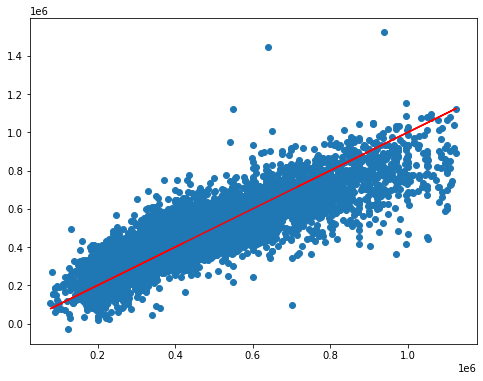

In [68]:
Y_train_pred_Ri = model_Ridge.predict(X_train_poly)
Y_test_pred_Ri = model_Ridge.predict(X_test_poly)
plt.figure(figsize = (8,6))
plt.scatter(Y_test, Y_test_pred_Ri)
plt.plot(Y_test, Y_test, 'r');

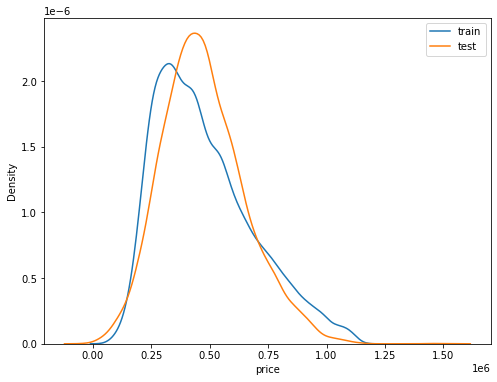

In [140]:
plt.figure(figsize = (8,6))
sns.kdeplot(data = df, x = 'price', label ='train')
sns.kdeplot(x= Y_test_pred_Ri, label ='test')
plt.legend()
plt.show()

In [69]:
print("*** Evaluating Ridgement Regression: ***", "\n")
measure_accuracy(Y_train, Y_train_pred_Ri, train = True)
measure_accuracy(Y_test, Y_test_pred_Ri, train = False)

*** Evaluating Ridgement Regression: *** 

Training Result : 
------------------
MAE: 77173.508
MSE: 10443280411.607
RMSE: 102192.370
Explained Variance Score: 0.762
R2 Square: 0.762


Testing Result : 
------------------
MAE: 78060.895
MSE: 11055341024.301
RMSE: 105144.382
Explained Variance Score: 0.738
R2 Square: 0.738


In [70]:
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(random_state=0)
model_DTR.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

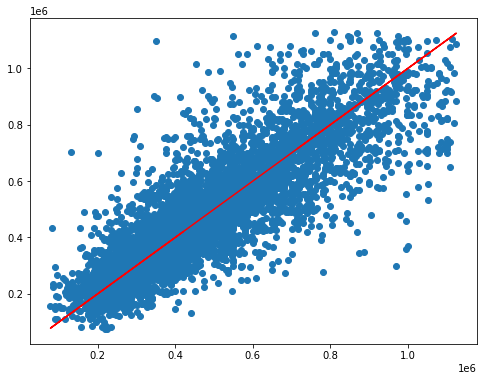

In [145]:
Y_train_pred_DTR = model_DTR.predict(X_train)
Y_test_pred_DTR = model_DTR.predict(X_test)
plt.figure(figsize = (8,6))
plt.scatter(Y_test, Y_test_pred_DTR)
plt.plot(Y_test, Y_test, 'r');

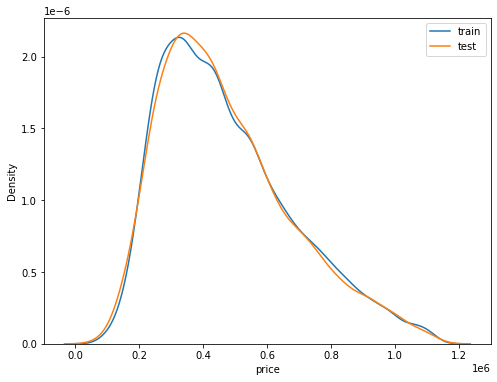

In [146]:
plt.figure(figsize = (8,6))
sns.kdeplot(data = df, x = 'price', label ='train')
sns.kdeplot(x= Y_test_pred_DTR, label ='test')
plt.legend()
plt.show()

In [72]:
print("*** Evaluating Decision Tree Regression: ***", "\n")
measure_accuracy(Y_train, Y_train_pred_DTR, train = True)
measure_accuracy(Y_test, Y_test_pred_DTR, train = False)

*** Evaluating Decision Tree Regression: *** 

Training Result : 
------------------
MAE: 0.000
MSE: 0.000
RMSE: 0.000
Explained Variance Score: 1.000
R2 Square: 1.000


Testing Result : 
------------------
MAE: 77308.527
MSE: 12363812677.858
RMSE: 111192.683
Explained Variance Score: 0.707
R2 Square: 0.707


## Evaluation and Comparison

In [73]:
from sklearn.metrics import r2_score
#Creation of R² scores
r2_LR = r2_score(Y_test,Y_test_pred_LR)*100
r2_RF = r2_score(Y_test, Y_test_pred_RF)*100
r2_XGB = r2_score(Y_test, Y_test_pred_XGB)*100
r2_Ridge = r2_score(Y_test, Y_test_pred_Ri)*100
r2_DTR = r2_score(Y_test, Y_test_pred_DTR)*100
#Printing R² scores
print("------------- R² SCORES OF MODELS ----------------\n")
print(f'Linear Regression R² Score       : {r2_LR}')
print(f'Random Forest Regressor R² Score : {r2_RF}')
print(f'XGBoost Regressor R² Score       : {r2_XGB}')
print(f'Ridgement R² Score               : {r2_Ridge}')
print(f'Decision Tree R² Score           : {r2_DTR}')

------------- R² SCORES OF MODELS ----------------

Linear Regression R² Score       : 73.76574069811095
Random Forest Regressor R² Score : 85.81812189852235
XGBoost Regressor R² Score       : 83.28279875471057
Ridgement R² Score               : 73.76595570570446
Decision Tree R² Score           : 70.66098560647383


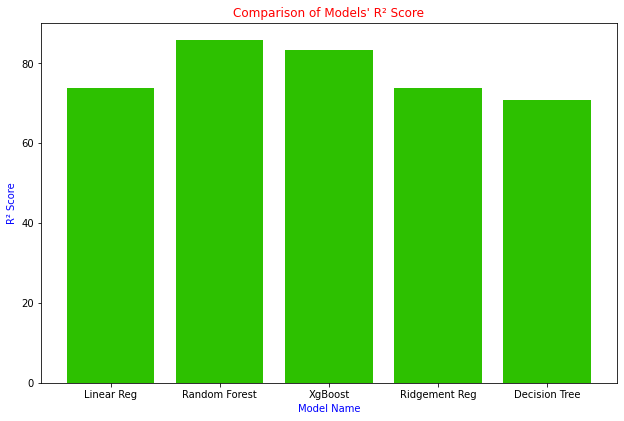

In [74]:
#Bar Graph Display of R² Scores
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparison of Models' R² Score", color='r')
ax.set_xlabel('Model Name', color='b')
ax.set_ylabel('R² Score', color='b')
models_names = ['Linear Reg', 'Random Forest', 'XgBoost', 'Ridgement Reg', 'Decision Tree']
models_r2s = [r2_LR,r2_RF,r2_XGB,r2_Ridge,r2_DTR]
ax.bar(models_names, models_r2s,color="#2DC100")
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error as MSE
#Creation of MSE
mse_LR = MSE(Y_test,Y_test_pred_LR)
mse_RF = MSE(Y_test, Y_test_pred_RF)
mse_XGB = MSE(Y_test, Y_test_pred_XGB)
mse_Ridge = MSE(Y_test, Y_test_pred_Ri)
mse_DTR = MSE(Y_test, Y_test_pred_DTR)
#Printing MSE
print("------------- MSE OF MODELS ----------------\n")
print(f'Linear Regression MSE            : {mse_LR}')
print(f'Random Forest Regressor R² Score : {mse_RF}')
print(f'XGB Regression R² Score          : {mse_XGB}')
print(f'Ridgement R² Score               : {mse_Ridge}')
print(f'Decision Tree R² Score           : {mse_DTR}')

------------- MSE OF MODELS ----------------

Linear Regression MSE            : 11055431631.080616
Random Forest Regressor R² Score : 5976413587.553274
XGB Regression R² Score          : 7044829179.415982
Ridgement R² Score               : 11055341024.301031
Decision Tree R² Score           : 12363812677.85833


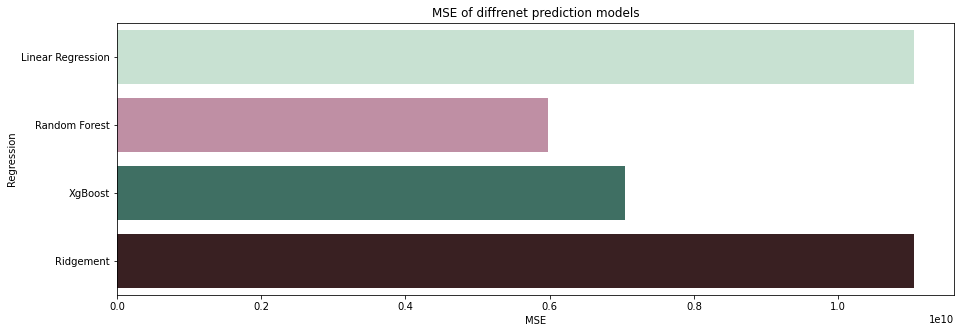

In [76]:
MSE = []
Regressor = []
MSE.append(mse_LR), Regressor.append('Linear Regression')
MSE.append(mse_RF), Regressor.append('Random Forest')
MSE.append(mse_XGB), Regressor.append('XgBoost')
MSE.append(mse_Ridge), Regressor.append('Ridgement')

plt.subplots(figsize = (15,5))
plt.rc('font')
sns.barplot(x = MSE, y = Regressor, palette = sns.cubehelix_palette(len(MSE),rot=2))
plt.xlabel("MSE")
plt.ylabel("Regression")
plt.title('MSE of diffrenet prediction models')
plt.show()

## Conclusion

* After we build model and evaluate, also compare each model, we can see that Random Forest Regressor model is suitable to predict the price of dataset